In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [3]:
train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [5]:
colors=sns.color_palette('dark')

In [6]:
from skimpy import skim 
skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 750000 │ │ int32       │ 9     │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 9     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0     ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ id            │   0 │     0 │   375000 │  216500 │      0 │  187500 │  375000 │  562500 │  750000 │ ▇▇▇▇▇▇ │  │
│ │ age           │   0 │     0 │    40.93 │    10.1 │     18 │      33 │      39 │      48 │      95 │  ▂▇▅▁  │  │
│ │ balance       │   0 │     0 │     1204 │    2836 │  -8019 │       0 │     634 │    1390 │   99720 │   ▇    │  │
│ │ day           │   0 │     0 │    16.12 │   8.251 │      1 │       9 │      17 │      21 │      31 │ ▅▆▆▇▃▆ │  │
│ │ duration      │   0 │     0 │    256.2 │   272.6 │      1 │      91 │     133 │     361 │    4918 │   ▇    │  │
│ │ campaign      │   0 │     0 │    2.577 │   2.719 │      1 │       1 │       2 │       3 │      63 │   ▇    │  │
│ │ pdays         │   0 │     0 │    22.41 │   77.32 │     -1 │      -1 │      -1 │      -1 │     871 │   ▇    │  │
│ │ previous      │   0 │     0 │   0.2985 │   1.336 │      0 │       0 │       0 │       0 │     200 │   ▇    │  │
│ │ y             │   0 │     0 │   0.1207 │  0.3257 │      0 │       0 │       0 │       0 │       1 │ ▇    ▁ │  │
│ └───────────────┴─────┴───────┴──────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ job                       │       0 │          0 │                            1 │                   750000 │  │
│ │ marital                   │       0 │          0 │                            1 │                   750000 │  │
│ │ education                 │       0 │          0 │                            1 │                   750000 │  │
│ │ default                   │       0 │          0 │                            1 │                   750000 │  │
│ │ housing                   │       0 │          0 │                            1 │                   750000 │  │
│ │ loan                      │       0 │          0 │                            1 │                   750000 │  │
│ │ contact                   │       0 │          0 │                            1 │                   750000 │  │
│ │ month                     │       0 │          0 │                            1 │                   750000 │  │
│ │ poutcome                  │       0 │          0 │  

In [7]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [8]:
train['y'].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

In [9]:
from summarytools import dfSummary
dfSummary(train)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 374999.5 (216506.5)min < med < max:0.0 < 374999.5 < 749999.0IQR (CV) : 374999.5 (1.7),"750,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,age[int64],Mean (sd) : 40.9 (10.1)min < med < max:18.0 < 39.0 < 95.0IQR (CV) : 15.0 (4.1),78 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACxUlEQVR4nO3dv07bUBiG8fckJHICPZYVCTaWjkgdGHMRXGzXbgxcQdZOWRASMkFxcePY7tQupYCP7cZf9Pz243h4lOh8/hNX17WAoRsd+gSAjzg59Am8xTk3kzQNXL6r6/qly/PB4Qw2VOfcbLFY3Hjvk5D1z8/PqXPuK7Eeh8GGKmnqvU+Wy+VLHMd5k4WbzSa6u7tLHh8fp5II9QgMOVRJUhzH+fn5+Y+ApbPOTwYHw2YKJhAqTCBUmECoMKHXzVTLOaivqmrS5fnArt5CbTsHLYoiKsvyKs/zW0khu34ckT6/UYPnoJK0Xq+T1Wo13+/34z5ODrb0PkcNnYOmacocFH+wmYIJhAoTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmDD4p1BDlWU5keSdc6GH4AUWA3KUoWZZNimK4svl5eV4PB43vhdW4gUWQ3OUoe52u5MoiubX19f5xcVF2nQ9L7AYnqMM9bfT09PQl1dIvMBiUNhMwQRChQlH/dPfRsupARODjhHqK9pODZgYdI9QX9FmasDEoB+E+oYWUwMmBh1jMwUTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQncON0DnrfqHqF2jOet+kGoHeN5q34Qak943qpbbKZgAqHCBEKFCYQKEwgVJhAqTCBUmPDuHNU5N5M0DTi2r6pqErAO+MuboTrnZovF4sZ7nzQ9cFEUUVmWV3me30oKfT05IOn9b9Sp9z5ZLpcvcRw3um69Xq+T1Wo13+/34xbnB0j64CXUOI4bXw5M05RLgegM1/oHpoM/chtJqgLXDvYWww+FutlsoqYH3m63kSRlWRY9PDzM/+d6q599f3//qc0tgmVZTrIs+3x2dvZ9NBoVTdc/PT1tnXPfJAX9iVxLP+u6/ufn/gK/CyoIyzKEYgAAAABJRU5ErkJggg=="">",0(0.0%)
3,job[object],1. management2. blue-collar3. technician4. admin.5. services6. retired7. self-employed8. entrepreneur9. unemployed10. housemaid11. other,"175,541 (23.4%)170,498 (22.7%)138,107 (18.4%)81,492 (10.9%)64,209 (8.6%)35,185 (4.7%)19,020 (2.5%)17,718 (2.4%)17,634 (2.4%)15,912 (2.1%)14,684 (2.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEHUlEQVR4nO3cTWobWQBG0adgTGciYQxejBbRi+1FaDfGWIN2yEQZxGnizo9tpeqWkM6ZeRB4g8sTVdSX1eFwGFD4sPQBuBxiIyM2MmIjIzYyYiMjNjJiIyM2MqsxxscxxvXSB/nO58Ph8LT0IZje1e3t7d/r9fpm6YN8s9/vH1ar1T+COz9X6/X6ZrvdPm02m09LH+bx8fGv3W53c39/fz3GENuZuRpjjM1m8+nu7u7fpQ/z7OPSB2AeHhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M1RhfvyNb+iBjnM45mMfVfr9/2O12N+NEviPb7/cPY4zPS5+D6dkgkFn5L7OonNrN5lY7Yye1rrKsOm8ns66yrDp/p7auOoknYubhpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZkxm8nMIZmNdJDV6MXc6bz8LJGLyQWepmc4NdoEUGL4YtlykfvBi2XK6lBi+LP/nS81KXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNTD54MWy5XIsMXgxbLpPPwskYvJDxgEBmqp9RP4u8apJ1lbUUb/HH6yprKd5qqnWVtRSv8oBARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5o/XVdZSvNUk6yprKd7CZ+FkrKvIHHuzucl4t6MGLwYuHOPdgxcDF4517ODFwIV381KXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzLsHLwYuHOuowYuBC8fwWTgZgxcyr91sbjAm89vBi2ELU/rl4MWwham9NngxbGEyXuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZX66rrKiY2m/XVVZUTMkGgYx1FZmf3WxuM2bxw7rKooq5vFhXWVQxp5+tqyyqmIWXumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGReDF6MXJjTD4MXIxfm4rNwMgYvZNxsZAxeyBi8kDF4IeOlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2R8Fk7G4IWMBwQyfkbJWFeRsa4iY11FxgMCGbGRERsZsZERGxmxkR

### Categorical Data 

Text(0.5, 1.0, 'housing')

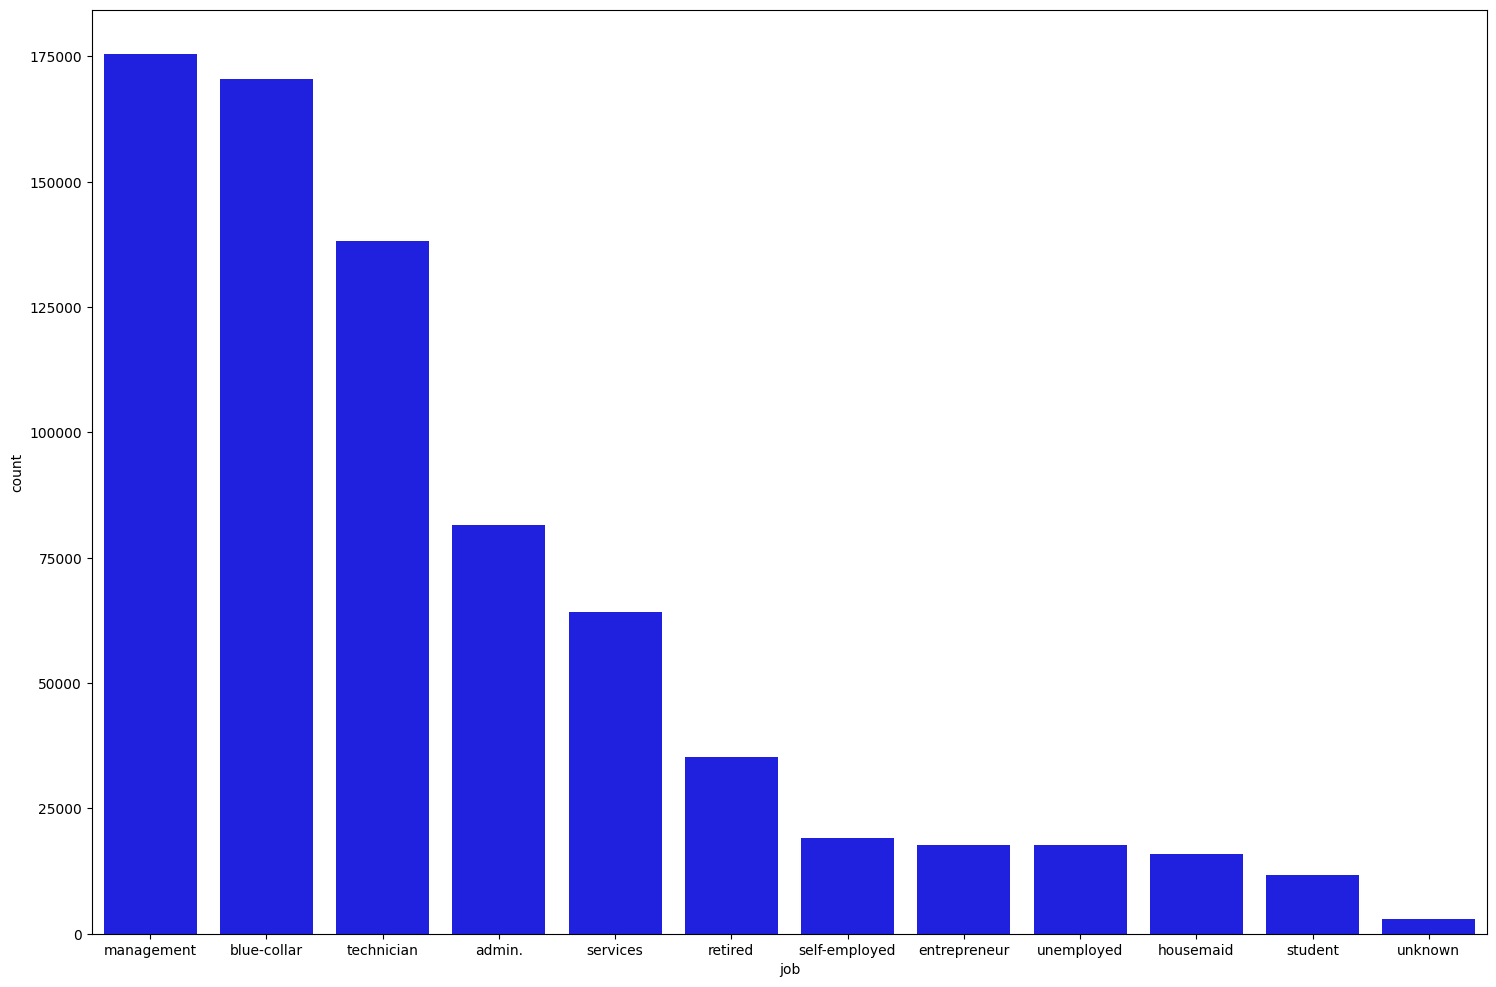

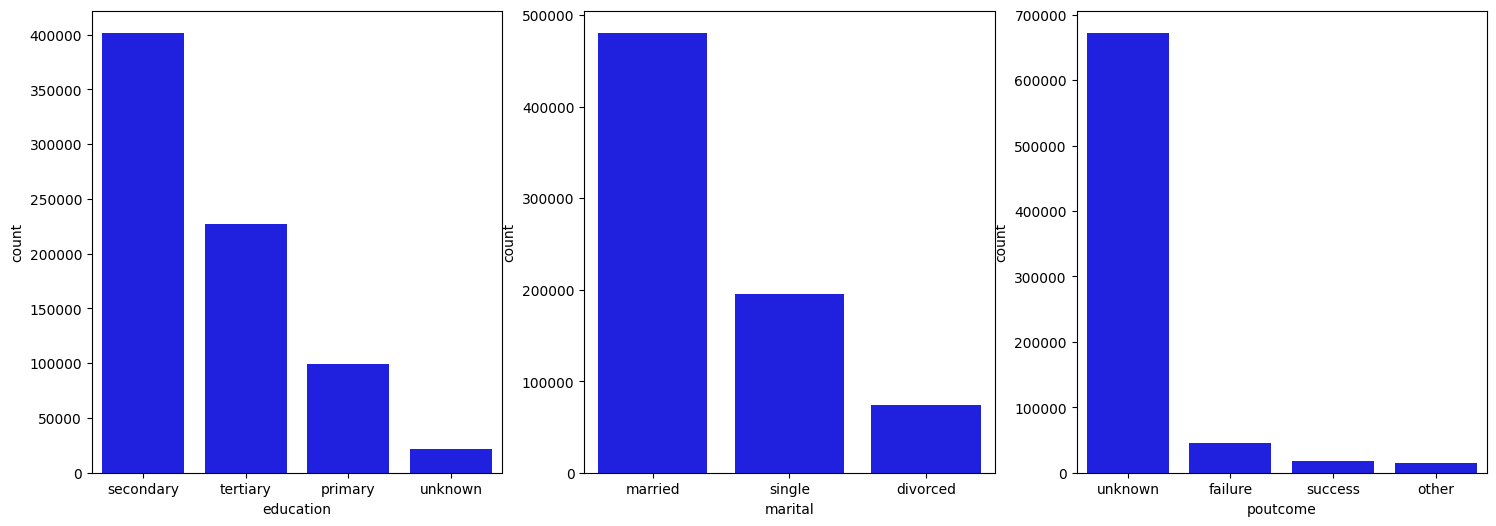

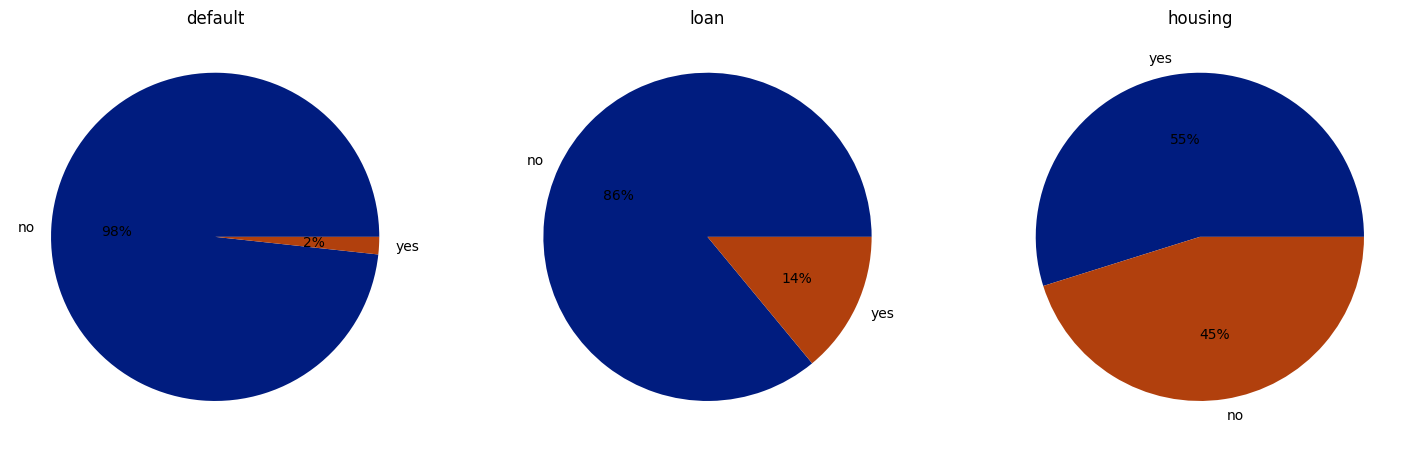

In [10]:

fig1, axes0 = plt.subplots(1, 1, figsize=(18, 12))  
sns.barplot(train['job'].value_counts(), color='blue',ax=axes0) 
fig2, axes1 = plt.subplots(1, 3, figsize=(18, 6))  
sns.barplot(train['education'].value_counts(),color='blue', ax=axes1[0])
sns.barplot(train['marital'].value_counts(),color='blue', ax=axes1[1])
sns.barplot(train['poutcome'].value_counts(),color='blue', ax=axes1[2])
fig3, axes2 = plt.subplots(1, 3, figsize=(18, 6))  
axes2[0].pie(train['default'].value_counts(),labels=train['default'].value_counts().index, colors=colors, autopct='%.0f%%')
axes2[0].set_title('default')
axes2[1].pie(train['loan'].value_counts(),labels=train['loan'].value_counts().index, colors=colors, autopct='%.0f%%')
axes2[1].set_title('loan')
axes2[2].pie(train['housing'].value_counts(),labels=train['housing'].value_counts().index, colors=colors, autopct='%.0f%%')
axes2[2].set_title('housing')

## Some Notes :
- We see here a large difference between values in these three columns :( balance	duration campaign pdays	previous)

In [11]:
train.describe()


,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


- We need to make the values in the same rang so we can see the corrolations and distributions clearly 

In [13]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
sc_cols=['balance','previous','pdays','campaign','duration']
for col in sc_cols:
    train[col]=MM.fit_transform(train[[col]])
    test[col]=MM.fit_transform(test[[col]])

train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,0.074497,no,no,cellular,25,aug,0.023592,0.032258,0.000000,0.000,unknown,0
1,1,38,blue-collar,married,secondary,no,0.079203,no,no,unknown,18,jun,0.037421,0.000000,0.000000,0.000,unknown,0
2,2,36,blue-collar,married,secondary,no,0.080020,yes,no,unknown,14,may,0.022371,0.016129,0.000000,0.000,unknown,0
3,3,27,student,single,secondary,no,0.074748,yes,no,unknown,28,may,0.001830,0.016129,0.000000,0.000,unknown,0
4,4,26,technician,married,secondary,no,0.082684,yes,no,cellular,3,feb,0.183242,0.000000,0.000000,0.000,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,0.086331,no,yes,unknown,4,jul,0.204393,0.016129,0.000000,0.000,unknown,1
749996,749996,69,retired,divorced,tertiary,no,0.080289,no,no,cellular,19,aug,0.017490,0.000000,0.000000,0.000,unknown,0
749997,749997,50,blue-collar,married,secondary,no,0.076446,yes,no,cellular,17,apr,0.022778,0.000000,0.000000,0.000,unknown,0
749998,749998,32,technician,married,secondary,no,0.071889,no,no,cellular,26,aug,0.021761,0.080645,0.000000,0.000,unknown,0


In [14]:
sns.pairplot(train,hue='y')

Error in callback <function flush_figures at 0x000002506A4C85E0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

- We encode the categorical data with label encoder  :

In [ ]:
from sklearn.preprocessing import LabelEncoder 
la = LabelEncoder()
en_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for col in en_cols:
    train[col]= la.fit_transform(train[col])
    test[col]= la.fit_transform(test[col])
train    

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,9,1,1,0,0.074497,0,0,0,25,aug,0.023592,0.032258,0.000000,0.000,3,0
1,1,38,1,1,1,0,0.079203,0,0,2,18,jun,0.037421,0.000000,0.000000,0.000,3,0
2,2,36,1,1,1,0,0.080020,1,0,2,14,may,0.022371,0.016129,0.000000,0.000,3,0
3,3,27,8,2,1,0,0.074748,1,0,2,28,may,0.001830,0.016129,0.000000,0.000,3,0
4,4,26,9,1,1,0,0.082684,1,0,0,3,feb,0.183242,0.000000,0.000000,0.000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,7,2,1,0,0.086331,0,1,2,4,jul,0.204393,0.016129,0.000000,0.000,3,1
749996,749996,69,5,0,2,0,0.080289,0,0,0,19,aug,0.017490,0.000000,0.000000,0.000,3,0
749997,749997,50,1,1,1,0,0.076446,1,0,0,17,apr,0.022778,0.000000,0.000000,0.000,3,0
749998,749998,32,9,1,1,0,0.071889,0,0,0,26,aug,0.021761,0.080645,0.000000,0.000,3,0


In [ ]:
train['month'] = pd.to_datetime(train['month'], format='%b')
test['month'] = pd.to_datetime(test['month'], format='%b')
train['month'] = train['month'].dt.month
test['month'] = test['month'].dt.month
train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,9,1,1,0,0.074497,0,0,0,25,8,0.023592,0.032258,0.000000,0.000,3,0
1,1,38,1,1,1,0,0.079203,0,0,2,18,6,0.037421,0.000000,0.000000,0.000,3,0
2,2,36,1,1,1,0,0.080020,1,0,2,14,5,0.022371,0.016129,0.000000,0.000,3,0
3,3,27,8,2,1,0,0.074748,1,0,2,28,5,0.001830,0.016129,0.000000,0.000,3,0
4,4,26,9,1,1,0,0.082684,1,0,0,3,2,0.183242,0.000000,0.000000,0.000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,7,2,1,0,0.086331,0,1,2,4,7,0.204393,0.016129,0.000000,0.000,3,1
749996,749996,69,5,0,2,0,0.080289,0,0,0,19,8,0.017490,0.000000,0.000000,0.000,3,0
749997,749997,50,1,1,1,0,0.076446,1,0,0,17,4,0.022778,0.000000,0.000000,0.000,3,0
749998,749998,32,9,1,1,0,0.071889,0,0,0,26,8,0.021761,0.080645,0.000000,0.000,3,0


KeyboardInterrupt: 

In [ ]:
train['balence per duration']=train['balance']/(train['duration']+ 1e-6)
test['balence per duration']=test['balance']/(test['duration']+ 1e-6)
train['balance_age_ratio'] = train['balance'] / (train['age'] + 1e-6) 
train['campaign_duration_ratio'] = train['campaign'] / (train['duration'] + 1e-6)
train['pdays_success'] = (train['pdays'] > 0).astype(int)
test['balance_age_ratio'] = test['balance'] / (test['age'] + 1e-6)
test['campaign_duration_ratio'] = test['campaign'] / (test['duration'] + 1e-6)
test['pdays_success'] = (test['pdays'] > 0).astype(int)

train

NameError: name 'ftrain' is not defined

In [ ]:
train.drop('id',axis=1,inplace=True)
#train.drop('previous',axis=1,inplace=True)
#train.drop('pdays',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
#test.drop('previous',axis=1,inplace=True)
#test.drop('pdays',axis=1,inplace=True)
Y=train['y']
train.drop('y',axis=1,inplace=True)
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balence per duration,balance_age_ratio,campaign_duration_ratio,pdays_success
0,42,9,1,1,0,7,0,0,0,25,8,117,3,-1,0,3,0.059829,0.166667,0.025641,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,2.778378,13.526315,0.005405,0
2,36,1,1,1,0,602,1,0,2,14,5,111,2,-1,0,3,5.423423,16.722222,0.018018,0
3,27,8,2,1,0,34,1,0,2,28,5,10,2,-1,0,3,3.400000,1.259259,0.200000,0
4,26,9,1,1,0,889,1,0,0,3,2,902,1,-1,0,3,0.985588,34.192306,0.001109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,7,2,1,0,1282,0,1,2,4,7,1006,2,-1,0,3,1.274354,44.206895,0.001988,0
749996,69,5,0,2,0,631,0,0,0,19,8,87,1,-1,0,3,7.252873,9.144927,0.011494,0
749997,50,1,1,1,0,217,1,0,0,17,4,113,1,-1,0,3,1.920354,4.340000,0.008850,0
749998,32,9,1,1,0,-274,0,0,0,26,8,108,6,-1,0,3,-2.537037,-8.562500,0.055556,0


In [ ]:
from sklearn.utils import class_weight



# Compute class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Y), y=Y)

# Convert to dictionary format
class_weights_dict = dict(zip(np.unique(Y), weights))
print(class_weights_dict)


{0: 0.5686022392314317, 1: 4.1441959154805055}


In [ ]:
train['balence per duration'].max()

17440.982559017444

In [ ]:
train['balence per duration']=MM.fit_transform(train[['balence per duration']])
test['balence per duration']=MM.fit_transform(test[['balence per duration']])
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balence per duration,balance_age_ratio,campaign_duration_ratio,pdays_success
0,42,9,1,1,0,7,0,0,0,25,8,117,3,-1,0,3,0.061638,0.166667,0.025641,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0.061784,13.526315,0.005405,0
2,36,1,1,1,0,602,1,0,2,14,5,111,2,-1,0,3,0.061926,16.722222,0.018018,0
3,27,8,2,1,0,34,1,0,2,28,5,10,2,-1,0,3,0.061817,1.259259,0.200000,0
4,26,9,1,1,0,889,1,0,0,3,2,902,1,-1,0,3,0.061687,34.192306,0.001109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,7,2,1,0,1282,0,1,2,4,7,1006,2,-1,0,3,0.061703,44.206895,0.001988,0
749996,69,5,0,2,0,631,0,0,0,19,8,87,1,-1,0,3,0.062025,9.144927,0.011494,0
749997,50,1,1,1,0,217,1,0,0,17,4,113,1,-1,0,3,0.061738,4.340000,0.008850,0
749998,32,9,1,1,0,-274,0,0,0,26,8,108,6,-1,0,3,0.061498,-8.562500,0.055556,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
X_train,X_valid,Y_train,Y_test=train_test_split(train,Y,train_size=0.8,test_size=0.2,random_state=42,shuffle=True)
sample_weights = np.array([class_weights_dict[label] for label in Y_train])
sample_weights1 = np.array([class_weights_dict[label] for label in Y])
model0=LGBMRegressor(n_estimators=500,random_state=42)
model1=HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.05,random_state=42)
model2=GradientBoostingRegressor(n_estimators=500,random_state=42)
model3=XGBRegressor(n_estimators=500,random_state=42)
model4=CatBoostRegressor(n_estimators=500,random_state=42,learning_rate=0.05)

In [ ]:
model0.fit(X_train,Y_train,sample_weight=sample_weights)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1767
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 20
[LightGBM] [Info] Start training from score 0.499578


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
model1.fit(X_train,Y_train,sample_weight=sample_weights)

,loss,'squared_error'
,quantile,None
,learning_rate,0.05
,max_iter,1000
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


In [ ]:
#model2.fit(X_train,Y_train)

In [ ]:
model3.fit(X_train,Y_train,sample_weight=sample_weights)

,objective,'reg:squarederror'
,base_score,0.5
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,1
,colsample_bynode,1
,colsample_bytree,1
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
,gamma,0


In [ ]:
model4.fit(X_train,Y_train,sample_weight=sample_weights,cat_features=list(X_train.select_dtypes(include=['object']).columns))

0:	learn: 0.4945076	total: 7.61ms	remaining: 2m 32s
500:	learn: 0.2879643	total: 3.47s	remaining: 2m 15s
1000:	learn: 0.2806758	total: 7.17s	remaining: 2m 16s
1500:	learn: 0.2770946	total: 10.8s	remaining: 2m 13s
2000:	learn: 0.2749250	total: 14.7s	remaining: 2m 12s
2500:	learn: 0.2733725	total: 18.4s	remaining: 2m 8s
3000:	learn: 0.2721037	total: 22s	remaining: 2m 4s
3500:	learn: 0.2710392	total: 26.5s	remaining: 2m 4s
4000:	learn: 0.2701394	total: 30.1s	remaining: 2m
4500:	learn: 0.2693671	total: 33.4s	remaining: 1m 54s
5000:	learn: 0.2686532	total: 36.6s	remaining: 1m 49s
5500:	learn: 0.2680154	total: 40s	remaining: 1m 45s
6000:	learn: 0.2674257	total: 43.3s	remaining: 1m 40s
6500:	learn: 0.2668969	total: 46.4s	remaining: 1m 36s
7000:	learn: 0.2664108	total: 49.6s	remaining: 1m 32s
7500:	learn: 0.2659516	total: 52.8s	remaining: 1m 27s
8000:	learn: 0.2655135	total: 55.9s	remaining: 1m 23s
8500:	learn: 0.2650991	total: 59.3s	remaining: 1m 20s
9000:	learn: 0.2647132	total: 1m 2s	remain

In [ ]:
pred0=model0.predict(X_valid)
print(pred0)
print(roc_auc_score(Y_test,pred0))

[-1.24375707e-02  9.70179242e-01 -7.90315794e-04 ...  3.54696959e-02
  1.32273433e-02  9.85937843e-01]
0.9649975326945452


In [ ]:
pred1=model1.predict(X_valid)
print(pred1)
print(roc_auc_score(Y_test,pred1))

[-0.01502192  0.98578368 -0.00551235 ... -0.00997192 -0.00559649
  0.99878559]
0.9641038186953163


In [ ]:
# pred2=model2.predict(X_valid)
# print(pred2)
# print(roc_auc_score(Y_test,pred2))

In [ ]:
pred3=model3.predict(X_valid)
print(pred3)
print(roc_auc_score(Y_test,pred3))

[0.00882193 0.9236183  0.01475459 ... 0.01892146 0.01581882 0.91825175]
0.9661223914167049


In [ ]:
pred4=model4.predict(X_valid)
print(pred4)
print(roc_auc_score(Y_test,pred4))

[-0.00503524  0.97737464  0.0034525  ...  0.01115316  0.03818744
  0.85876386]
0.963814320757878


In [ ]:
testid=pd.read_csv('sample_submission.csv')
testid=testid['id']

In [ ]:
#df0=pd.DataFrame({"id":testid,"y":model0.predict(test)})
#df1=pd.DataFrame({"id":testid,"y":model1.predict(test)})
#df2=pd.DataFrame({"id":testid,"y":model2.predict(test)})
df3=pd.DataFrame({"id":testid,"y":model3.predict(test)})
df4=pd.DataFrame({"id":testid,"y":model4.predict(test)})

In [ ]:
#df0.to_csv("submission_malek0.csv",index=False)
#df1.to_csv("submission_malek1.csv",index=False)
#df2.to_csv("submission_malek2.csv",index=False)
df3.to_csv("submission_malek3.csv",index=False)
df4.to_csv("submission_malek4.csv",index=False)

In [ ]:
#df2.info()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
l1=Dense(units=128,activation='relu')
l2=Dense(units=64,activation='relu')
l3=Dense(units=32,activation='relu')
l4=Dense(units=16,activation='relu')
l5=Dense(units=1,activation='sigmoid')
model=Sequential(
    [tf.keras.Input(shape=(19,)),
    l1,l2,l3,l4,l5], name = "my_model"
)

In [ ]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 13,441 (52.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(name='auc')])
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history=model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2 , callbacks=[early_stop])

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 19, but received input with shape (128, 20)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(128, 20), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
y_pred_proba = model.predict(X_valid).ravel()  # probabilities
roc_auc = roc_auc_score(Y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3s 662us/step
ROC AUC Score: 0.9541592555723859


In [ ]:
loss, accuracy = model.evaluate(X_valid, Y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - auc: 0.9538 - loss: 0.1776
Test Loss: 0.1776
Test Accuracy: 0.9538


In [ ]:
pred=model.predict(X_valid)
print(pred)
print(roc_auc_score(Y_test,pred))

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3s 740us/step
[[6.11390395e-04]
 [8.27308297e-01]
 [9.13409312e-05]
 ...
 [1.09129025e-04]
 [1.70020200e-02]
 [2.49761075e-01]]
0.9520452688424141


In [ ]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balence per duration
0,32,1,1,1,0,0.088383,1,0,2,21,5,0.044964,0.000000,0.000000,0.000000,3,0.003974
1,44,4,1,2,0,0.075486,1,0,0,3,4,0.118616,0.017544,0.000000,0.000000,3,0.008954
2,36,6,1,0,0,0.075702,1,1,0,13,5,0.021974,0.017544,0.000000,0.000000,3,0.001663
3,58,1,1,1,0,0.062317,1,1,2,29,5,0.024822,0.000000,0.000000,0.000000,3,0.001547
4,28,9,2,1,0,0.093574,1,0,0,22,7,0.036216,0.000000,0.000000,0.000000,3,0.003389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,4,1,2,0,0.075270,1,0,0,18,11,0.012614,0.017544,0.000000,0.000000,3,0.000949
249996,40,7,1,3,0,0.080170,1,0,0,19,11,0.107426,0.000000,0.217890,0.006667,0,0.008612
249997,63,5,1,0,0,0.075580,0,0,0,3,7,0.035605,0.000000,0.106651,0.053333,2,0.002691
249998,50,1,1,0,0,0.099947,1,0,2,30,5,0.032553,0.017544,0.000000,0.000000,3,0.003254


In [ ]:
pred=model.predict(test).ravel()
df=pd.DataFrame({"id":testid,"y":pred})
pred

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 6s 775us/step


array([1.3412335e-03, 4.4180182e-01, 2.4108012e-04, ..., 8.1816208e-01,
       4.9736042e-04, 1.1536797e-01], dtype=float32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      250000 non-null  int64  
 1   y       250000 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 2.9 MB
